In [1]:
import torch
import torchvision
from torchvision import transforms,datasets

In [2]:
train=datasets.MNIST("",train=True,download=True,
                   transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("",train=False,download=True,
                   transform=transforms.Compose([transforms.ToTensor()]))


In [3]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True )
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True )

In [4]:
for data in trainset:
    print(data[0][0])
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [5]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show
print(data[1][0])

tensor(9)


In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,32)
        self.fc4=nn.Linear(32,10)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        return F.log_softmax(x,dim=1)
        

In [8]:
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [9]:
y=net.forward(data[0][0].view(-1,28*28))
print(y)

tensor([[-2.5008, -2.3278, -2.3333, -2.1115, -2.2892, -2.1687, -2.2712, -2.5092,
         -2.1823, -2.4141]], grad_fn=<LogSoftmaxBackward>)


In [10]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)

Epochs=2
for epochs in range(Epochs):
    for data in trainset:
        x,y=data
        net.zero_grad()
        output=net(x.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2360, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)


In [11]:
torch.argmax(net(x[0].view(-1,28*28)))

tensor(9)

In [12]:
net(x[7].view(-1,28*28))

tensor([[-1.4022e+01, -7.8865e+00, -1.1907e-03, -7.2723e+00, -1.5097e+01,
         -1.5861e+01, -1.9102e+01, -9.3098e+00, -1.0485e+01, -2.3122e+01]],
       grad_fn=<LogSoftmaxBackward>)

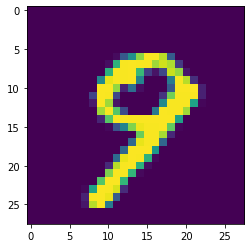

In [13]:
plt.imshow(x[0].view(28,28))
plt.show()

In [14]:
correct=0
total=0
for tdata in testset:
    x,y=tdata
    output=net(x.view(-1,28*28))
    for i in range(len(output)):
        if y[i]==torch.argmax(output[i]):
            correct=correct+1
        total=total+1
print(correct/total)

0.9609


In [15]:
from skimage import color
from skimage import io

In [58]:

def premod(c='6.png'):
    img = color.rgb2gray(io.imread(c))
    plt.imshow(img)
    plt.show()
    imgt=torch.FloatTensor(img)
    return imgt

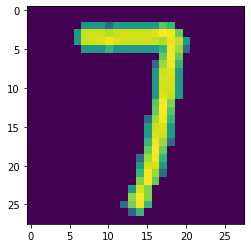

tensor(2)

In [59]:
k=premod('6.png')
torch.argmax(net.forward(k.view(-1,28*28)))